In [26]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [14]:
y = dataset.target
X = dataset.data

import sklearn
#X = sklearn.preprocessing.scale(X)


In [27]:
import numpy as np
import pandas
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.neighbors import KNeighborsRegressor
kf = KFold(n_splits = 5 , random_state = 42, shuffle = True)
p_koef = np.linspace(1, 10, 200)
def test_accuracy(kf, X, y):
    scores = list()
    for p in p_koef:
        model = KNeighborsRegressor(p=p, n_neighbors=5,weights = 'distance')
        scores.append(cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
    return pandas.DataFrame(scores, p_koef).max(axis=1).sort_values(ascending=False)

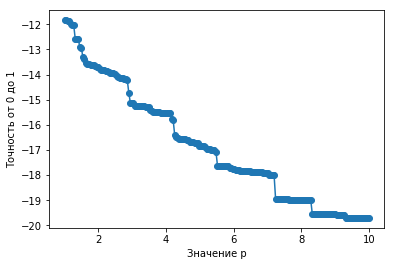

In [39]:
dat = test_accuracy(kf,X,y) 
plt.plot(p_koef,data, marker='o')
plt.xlabel('Значение p')
plt.ylabel('Точность от 0 до 1')
plt.show()

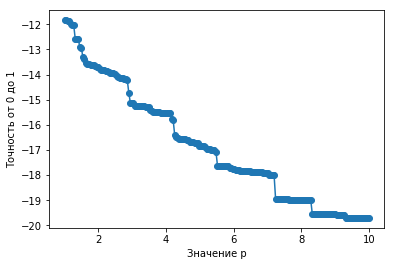

In [40]:
X = sklearn.preprocessing.scale(X)
dat = test_accuracy(kf, X, y)
plt.plot(p_koef,dat, marker='o')
plt.xlabel('Значение p')
plt.ylabel('Точность от 0 до 1')
plt.show()